<a href="https://colab.research.google.com/github/omkar00004/Decision_Tree_Classification/blob/main/Decision_Tree_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

# Import Dataset

In [3]:
from google.colab import files

uploaded = files.upload()

Saving car.data to car (1).data


# Import Data

In [4]:
df = pd.read_csv("car.data", header = None)

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


# Exploratory data analysis

In [6]:
# view data dimesions
df.shape

(1728, 7)

There are 1728 instances and 7 variables

# Rename the columns names

This dataset does not have any columns names, allocating columns names according to the dataset Source url - http://archive.ics.uci.edu/ml/datasets/Car+Evaluation

In [7]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

# Inserting the col_names in dataset
df.columns = col_names

In [8]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
# View summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


# Value count of each instance

In [10]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df[col].value_counts(), '\n')

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64 

maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64 

doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64 

persons
2       576
4       576
more    576
Name: count, dtype: int64 

lug_boot
small    576
med      576
big      576
Name: count, dtype: int64 

safety
low     576
med     576
high    576
Name: count, dtype: int64 

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64 



Above variables are self explanatory, but class is evaulation level (unacceptable, acceptable, good, very good)

# Check the missing values

In [11]:
df.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
class,0


# Declare Feature vector and Target Variable

In [12]:
X = df.drop(['class'], axis=1)

y = df['class']

# Split the data into Training, Cross Validation and Testing set

In [13]:
# Split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Check Dimensions of Training and Testing sets

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1382, 6), (1382,), (346, 6), (346,))

# Feature Engineering


**Feature engineering** is th process of transforming the raw data into useful features that help us to undestand our model better and increase its predictive power


In [15]:
# Datatype in X_train
X_train.dtypes

,0
buying,object
maint,object
doors,object
persons,object
lug_boot,object
safety,object


In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low


All the above data object or categorical data. So we need to convert that categorical data into Numerical using **One Hot Encoding**

# One Hot Encoding

In [17]:
!pip install category_encoders

import category_encoders as ce # First we install the category_encoders package

In [18]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

**OrdinalEncoder()** :

**Encodes categorical features as ordinal, in one ordered feature.**

Ordinal encoding uses a single column of integers to represent the classes. An optional mapping dict can be passed in; in this case, we use the knowledge that there is some true order to the classes themselves. Otherwise, the classes are assumed to have no true order and integers are selected at random.

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


# Decision Tree Classifier with **Criterion Gini Index**

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
# Decision Tree model with Criterion Gini Index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

## Visualize the trained decision tree

In [22]:
from sklearn.tree import export_graphviz

export_graphviz(
    clf_gini,
    out_file="car_tree.dot",
    feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
    class_names=df['class'],
    rounded=True,
    filled=True
)

Visualize the **trained** decision tree by first using export_graphviz() function to output a graph defination file called *car_tree.dot*

Use graphviz.Source.from_file() to load and Display the file


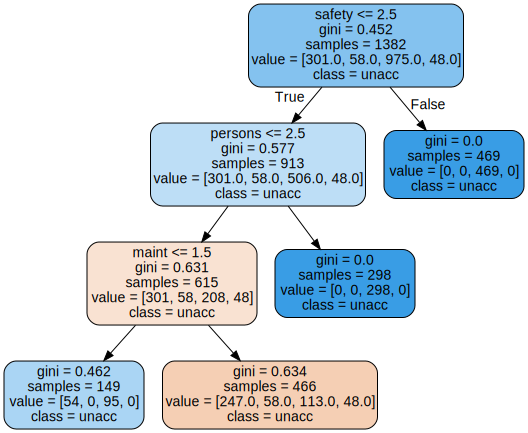

In [23]:
from graphviz import Source

Source.from_file("car_tree.dot")

## Check Cross Validation

- **We use the Validation dataset to choose the model**


In [24]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_gini, X_train, y_train, cv=5, scoring='accuracy')

print("Cross Validation Scores: ", scores)

Cross Validation Scores:  [0.78700361 0.81588448 0.80434783 0.79710145 0.78623188]


**cv  - cross validator**

- It specifies the number of folds to split the dataset into.
- For example, if cv=5, the dataset is divided into 5 folds:
  - Each fold is used once as the validation set.
 - The remaining folds are used as the training set.
 - This process repeats 5 times, ensuring every fold is used as the validation set exactly once.

## Predict the Test set result with criterion gini


In [25]:
y_pred_gini = clf_gini.predict(X_test) # y_pred_gini is the predicted class labels in the test set

In [26]:
print(y_test)

599     unacc
1201      acc
628     unacc
1498      acc
1263    unacc
        ...  
100     unacc
274     unacc
1206    unacc
101     unacc
1084    unacc
Name: class, Length: 346, dtype: object


## Check acuuracy score with criterion gini index

In [27]:
from sklearn.metrics import accuracy_score

print("Model Accuracy score with criterion gini index: {0:0.4f}".format(accuracy_score(y_test, y_pred_gini))) # accuracy_score(true_y, predicted_y)

Model Accuracy score with criterion gini index: 0.8179


## Compare the Training set and Testing set for Overfitting or Underfitting


In [28]:
y_train_pred_gini = clf_gini.predict(X_train)

y_train_pred_gini

array(['unacc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'acc'],
      dtype=object)

In [29]:
print("Training set Accuracy: {0:0.4f}".format(accuracy_score(y_train, y_train_pred_gini)))

Training set Accuracy: 0.8025


# Decision Tree Classifier with Criterion Entropy

In [30]:
# Decision Tree model with criterion entropy

clf_ent = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_ent.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [31]:
# Visualize the Decision Tree
from sklearn.tree import export_graphviz

export_graphviz(
    clf_ent,
    out_file="car_tree_ent.dot",
    feature_names=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'],
    class_names=df['class'],
    # rounded=True,
    filled=True
)

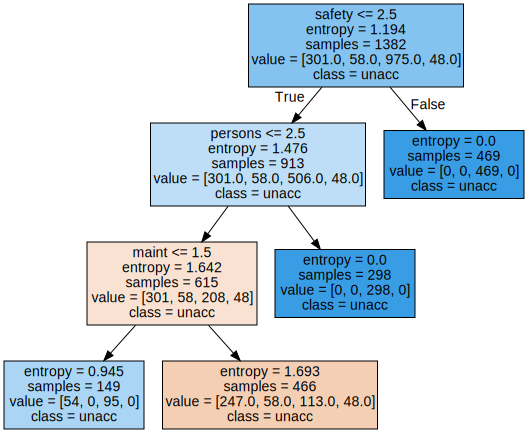

In [32]:
# from Displaying the tree
from graphviz import Source

Source.from_file("car_tree_ent.dot")

- **rounded** - When set to True, draw node boxes with rounded corners.

- **filled** - When set to True, paint nodes to indicate majority class for classification, extremity of values for regression, or purity of node for multi-output.

## Predict the test result with criterion entropy

In [33]:
y_pred_ent = clf_ent.predict(X_test)

print(y_pred_ent)

['unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'acc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'acc' 'acc' 'unacc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'acc' 'acc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'acc'
 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'unacc'
 'unacc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'acc' 'unacc' 'unacc' 'acc'
 'acc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc'
 'unacc' 'acc' 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'acc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'acc' 'unacc' 'unacc' 'acc' 'unacc'
 'unacc' 'unacc' 'unacc' 'unacc' 'acc' 'unacc' 'unacc

## Check the accuracy score with criterion entropy

In [34]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy {0:0.4f}'.format(accuracy_score(y_test, y_pred_ent)))

Model accuracy score with criterion entropy 0.8179


## Compare the train-set and test-set accuracy

In [35]:
y_train_pred_ent = clf_ent.predict(X_train)

In [36]:
print('Training set Accuracy Score: {0:0.4f}'.format(accuracy_score(y_train, y_train_pred_ent)))

Training set Accuracy Score: 0.8025


## Check for overfitting and underfitting

In [37]:
# print the scores on training and test set - entropy

print('Training set score(entropy): {:.4f}'.format(clf_ent.score(X_train, y_train)))
print('Test set score(entropy): {:.4f}'.format(clf_ent.score(X_test, y_test)))

# print the scores on training and test set - gini
print("\n")

print('Training set score(gini): {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score(gini): {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score(entropy): 0.8025
Test set score(entropy): 0.8179


Training set score(gini): 0.8025
Test set score(gini): 0.8179


# Confusion Matrix

A confusion matrix is a table to visualize the performance of a Classification problem

### Confusion matrix

-   A confusion matrix is a table which is used to visualize the preformance of a _classification_ problem.

-   For a _Binary classification_ problem, we have a $2\times2$ confusion matrix, which looks like this:

<p align="center">
<img src="https://github.com/Param302/ML-specialization-notes/blob/master/Course%202%20-%20Advanced%20Learning%20Algorithms/Week%203%20-%20Advice%20for%20applying%20machine%20learning/images/confusion-matrix-1.png?raw=true" alt="confusion matrix" width="400px" style="padding:10px 30px">
</p>

-   On top axis, we write **_Actual values_** which could be $0$ or $1$.
-   On left axis, we write **_Predicted values_** which could be $0$ or $1$.
-   So, imagine we are working on _Heart Disease Predictor_.
-   In _cross-validation_ set, we have $100$ values in the form of $0$ or $1$.
-   Let's say after predicting those $100$ values we got these results:
-   -   $15$ values are actually $1$ and classified as $1$.
-   -   $10$ values are actually $1$, but classified as $0$.
-   -   $70$ values are actually $0$, and classified as $0$.
-   -   $5$ values are actually $0$, but classified as $1$.
-   So, we write all these values in the confusion matrix like this:

<p align="center">
<img src="https://github.com/Param302/ML-specialization-notes/blob/master/Course%202%20-%20Advanced%20Learning%20Algorithms/Week%203%20-%20Advice%20for%20applying%20machine%20learning/images/confusion-matrix-2.png?raw=true" alt="confusion matrix values" width="400px" style="padding:10px 30px">
</p>

Confusinon Matrix

 [[ 65   0  18   0]
 [ 11   0   0   0]
 [ 17   0 218   0]
 [ 17   0   0   0]]


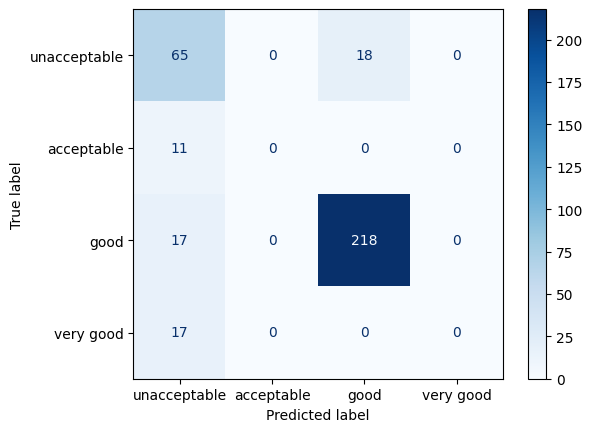

In [39]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_ent)

print("Confusinon Matrix\n\n", cm)

# Define class labels (adjust these to match your class names)
class_labels = ['unacceptable', 'acceptable', 'good', 'very good']

# Create confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)

# Plot the confusion matrix
disp.plot(cmap='Blues')  # You can change the color map as needed

plt.show()


- y_test or actual(real) is the **evaulation level** contain 4 parmaters:
 - unacceptable
 - acceptable
 - good
 - very good


## Classification Report

**Classification report** is another way to evaluate the classification model performance. It displays the **precision, recall, f1 and support scores** for the model.

In [40]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_ent))

              precision    recall  f1-score   support

         acc       0.59      0.78      0.67        83
        good       0.00      0.00      0.00        11
       unacc       0.92      0.93      0.93       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.82       346
   macro avg       0.38      0.43      0.40       346
weighted avg       0.77      0.82      0.79       346

